# Getting started with `geovar`

This notebook highlights an instructive example of how to generate "GeoVar"-style plots using an example dataset of 5000 randomly chosen bi-allelic variants on Chromosome 22 from the new high-coverage sequencing of the [1000 Genomes Project from the New York Genome Center](http://ftp.1000genomes.ebi.ac.uk/vol1/ftp/data_collections/1000G_2504_high_coverage/working/20190425_NYGC_GATK/)



## Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pkg_resources
from geovar import *

## Data

The `geovar` package contains example frequency tables as well as a gzipped vcf dataset to illustrate how to move from a [VCF](https://samtools.github.io/hts-specs/VCFv4.2.pdf) file and a population panel file to a full "GeoVar"-plot. 


In [2]:
data_path = pkg_resources.resource_filename("geovar", "data")

# Filepath to the VCF File
vcf_file = "{}/new_1kg_nygc.chr22.biallelic_snps.filt.n5000.vcf.gz".format(data_path)

# Filepath to the population panel file
population_panel = "{}/integrated_call_samples_v3.20130502.1kg_superpops.panel".format(data_path)

In [3]:
print(population_panel)

/Users/aabiddanda/.pyenv/versions/3.9.1/envs/venv_geovar/lib/python3.9/site-packages/geovar/data/integrated_call_samples_v3.20130502.1kg_superpops.panel


The population panel file is a two column file with the columns `sample` and `pop` separated by whitespace. The sample column must match the `sample` IDs in the VCF file. the `pop` column contains population labels

In [4]:
# Reading the population dataframe
pop_df = read_pop_panel(population_panel)

# Writing out VCF to a Frequency Table
af_df = vcf_to_freq_table(vcf_file, pop_df=pop_df, outfile="{}/test.freq.csv".format(data_path), minor_allele=True)

# Print the beginning of the allele frequency table 
af_df.head()

5000it [00:02, 2059.90it/s]


,CHR,SNP,A1,A2,MAC,MAF,AFR,AMR,EAS,EUR,SAS
0,22,10662593,C,T,1,0.000201,0.000759,0.000000,0.000000,0.000000,0.000000
1,22,10664208,G,A,38,0.008137,0.028963,0.000000,0.000000,0.000000,0.000000
2,22,10666881,C,A,1,0.000218,0.000000,0.000000,0.000000,0.000000,0.001104
3,22,10670699,T,A,1633,0.354538,0.228395,0.379538,0.501029,0.259709,0.447137
4,22,10679257,A,T,35,0.007008,0.025797,0.001449,0.000000,0.000000,0.000000


## Generating a GeoVar Object 

Once we have a frequency table, the next step is to categorize each variant by its frequency in each population. The default binning scheme is to label mutations with population allele frequencies in the interval of (0,0.05] as Rare, and those with frequency above 0.05 as common. Below we will show how to change the frequency cutoff and how to add categories. 

In [5]:
# Creating the GeoVar Object 
geovar_test = GeoVar()

# Adding in the frequency file (all of it)
geovar_test.add_freq_mat(freq_mat_file="{}/test.freq.csv".format(data_path))

# Generate a geovar binning with the binning we used in our paper
geovar_test.geovar_binning()

# Printing details about the GeoVar object 
print(geovar_test)

/Users/aabiddanda/.pyenv/versions/3.9.1/envs/venv_geovar/lib/python3.9/site-packages/geovar/binning.py:47: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  af_df = pd.read_table(freq_mat_file, sep=r"\s")


GeoVar
number of variants: 5000
number of pops: 5
pops: AFR,AMR,EAS,EUR,SAS
allele freq bins: (0, 0),(0, 0.05),(0.05, 1.0)


## Visualization

Using the `GeoVar` object we created in the last section, we can generate a “GeoVar”-plot

In [6]:
geovar_plot = GeoVarPlot()

# Adding data directly from the geovar object itself
geovar_plot.add_data_geovar(geovar_test)

# Filter to remove very rare categories (only to speed up plotting)
geovar_plot.filter_data()

# Adding in a colormap (see code for alternative ideas beyond default)
geovar_plot.add_cmap()

# Shifting order of regional groupings to reflect OOA-demography
geovar_plot.reorder_pops(np.array(['AFR','EUR','SAS','EAS','AMR']))

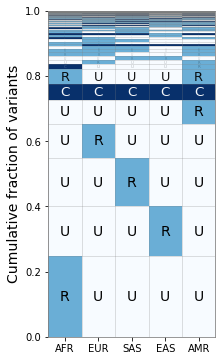

In [7]:
fig, ax = plt.subplots(1,1,figsize=(3,6))
# The full plotting routine
geovar_plot.plot_geovar(ax);
ax.set_xticklabels(geovar_plot.poplist);

If we want the percentages next to each value, we can run the following:

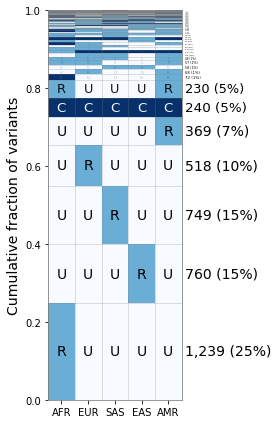

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(4,6), sharey=True)

geovar_plot.plot_geovar(ax);

geovar_plot.plot_percentages(ax);

# Setting the x-labels
ax.set_xticklabels(geovar_plot.poplist);
plt.tight_layout()

## Changing the Binning  

Suppose that we want to distinguish between "low-frequency" (1% < MAF < 5%) and "rare" variants (MAF < 1%). We can do this by generating a new binning scheme for the `GeoVar` object and then rerunning our plotting code. 

In [9]:
# Setting new bins
geovar_test.generate_bins([0., 0.01, 0.05])

# Generating new geovar codes
geovar_test.geovar_binning()

In [10]:
geovar_plot2 = GeoVarPlot()

# Adding data directly from the geovar object itself
geovar_plot2.add_data_geovar(geovar_test)

# Filter to remove very rare categories (only to speed up plotting)
geovar_plot2.filter_data()

# Adding in a colormap and a new set of labels since we have an additional category
geovar_plot2.add_cmap(str_labels=['U','R','L','C'], lbl_colors=['black', 'black','white','white'])

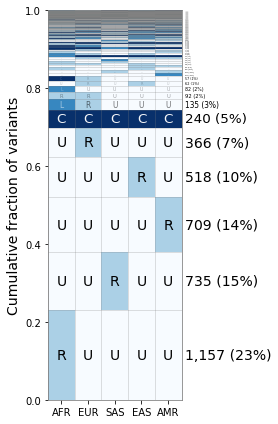

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(4,6), sharey=True)

geovar_plot2.plot_geovar(ax);
geovar_plot2.plot_percentages(ax);

# Setting the xlabels
ax.set_xticklabels(geovar_plot.poplist);

plt.tight_layout()

As you can see the "L" category does not appear till the 7th category here, but it does allow for other ways to break down the frequency categories and further exploration. 

## Reading in from GeoVar Counts Files

For some datasets like the ~92 million variants in the [NYGC 1000 Genomes Project](http://ftp.1000genomes.ebi.ac.uk/vol1/ftp/data_collections/1000G_2504_high_coverage/working/20190425_NYGC_GATK/), the full frequency table is too large to store in memory within a given jupyter notebook instance. 

In this case, we suggest processing the data in batches to create a geovar counts file, containing the numeric geovar code in the first column and the total count in the second column. We have included a file that we used in our analysis containing codes used in Figure 3B in [Biddanda et al 2020](https://elifesciences.org/articles/60107).   

In [12]:
geovar_counts_file  = "{}/new_1kg_nyc_hg38_filt_total.biallelic_snps.superpops_amended2.ncat3x.filt_0.geodist_cnt.txt.gz".format(data_path)

In [13]:
%%bash -s "$geovar_counts_file"

# NOTE: the counts file is gzipped in this case!
# NOTE: you may have to change gzcat -> zcat on linux!
gzcat $1 | head -n5

00001 12330992
00002 6731
00010 14619729
00011 342372
00012 6324


In [14]:
geovar_plot3 = GeoVarPlot()

# Adding data directly from the geovar object itself
geovar_plot3.add_text_data(geovar_counts_file, filt_unobserved=False)

# Filter to remove very rare categories (only to speed up plotting)
# geovar_plot3.filter_data()
geovar_plot3.sort_geodist()

# Adding in a colormap and a new set of labels since we have an additional category
geovar_plot3.add_cmap(str_labels=['U','R','C'], lbl_colors=['black', 'black','white'])
geovar_plot3.add_poplabels_manual(np.array(['AFR','EUR','SAS','EAS','AMR']))

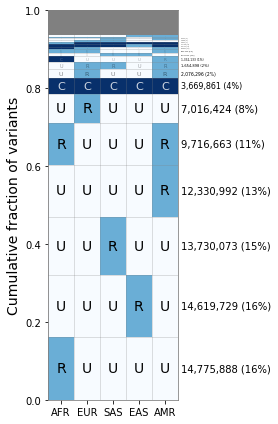

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(4,6), sharey=True)
geovar_plot3.plot_geovar(ax, pixel_thresh=100, freq_thresh=0.05, dpi=fig.dpi);

# NOTE:  you can change the default fontsize parameter to make the percentages fit 
geovar_plot3.fontsize = 10
geovar_plot3.plot_percentages(ax, pixel_thresh=100, freq_thresh=0.05, dpi=fig.dpi);

# Setting the xlabels
ax.set_xticklabels(geovar_plot3.poplist);
plt.tight_layout()